<a href="https://colab.research.google.com/github/AnaFerreira015/digital-image-processing-studies/blob/main/task_04_linear_combination_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

In [5]:
# Baixa a primeira imagem
url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/640px-Vd-Orig.png'
urllib.request.urlretrieve(url1, 'image1.jpg')

# Baixa a segunda imagem
url2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/640px-Example.jpg'
urllib.request.urlretrieve(url2, 'image2.jpg')

print("Imagens baixadas com sucesso!")

Imagens baixadas com sucesso!


In [6]:
i1 = cv2.imread('image1.jpg')
i2 = cv2.imread('image2.jpg')

In [7]:
# Redimensiona a segunda imagem para o tamanho da primeira
i2_resized = cv2.resize(i2, (i1.shape[1], i1.shape[0]))

cv2.imwrite('image2.jpg', i2_resized)
print("Imagens redimensionadas para o mesmo tamanho.")

Imagens redimensionadas para o mesmo tamanho.


In [8]:
def linear_combination(i1: np.ndarray, i2: np.ndarray, a1: float, a2: float) -> np.ndarray:
    """
    Calcula a combinação linear de duas imagens usando OpenCV:
    i_out = a1 * i1 + a2 * i2.

    Args:
        i1 (np.ndarray): Primeira imagem de entrada.
        i2 (np.ndarray): Segunda imagem de entrada.
        a1 (float): Peso escalar para a primeira imagem.
        a2 (float): Peso escalar para a segunda imagem.

    Returns:
        np.ndarray: Imagem resultante com o mesmo dtype das imagens de entrada.
    """
    # Garante que as imagens tenham as mesmas dimensões
    if i1.shape != i2.shape:
        raise ValueError("As imagens de entrada devem ter as mesmas dimensões.")

    # Calcula a combinação linear usando a função addWeighted do OpenCV
    output = cv2.addWeighted(i1, a1, i2, a2, 0)

    return output

In [9]:
if __name__ == "__main__":
    # Carrega as imagens
    i1 = cv2.imread('image1.jpg', cv2.IMREAD_COLOR)
    i2 = cv2.imread('image2.jpg', cv2.IMREAD_COLOR)

    if i1 is None or i2 is None:
        raise FileNotFoundError("Uma ou ambas as imagens não puderam ser carregadas. Verifique os caminhos dos arquivos.")

    # Define os pesos escalares
    a1, a2 = 0.6, 0.4

    # Calcula a combinação linear
    output = linear_combination(i1, i2, a1, a2)

In [10]:
cv2.imwrite('output_combined.jpg', output)
print("Imagem resultante salva como 'output_combined.jpg'")

Imagem resultante salva como 'output_combined.jpg'


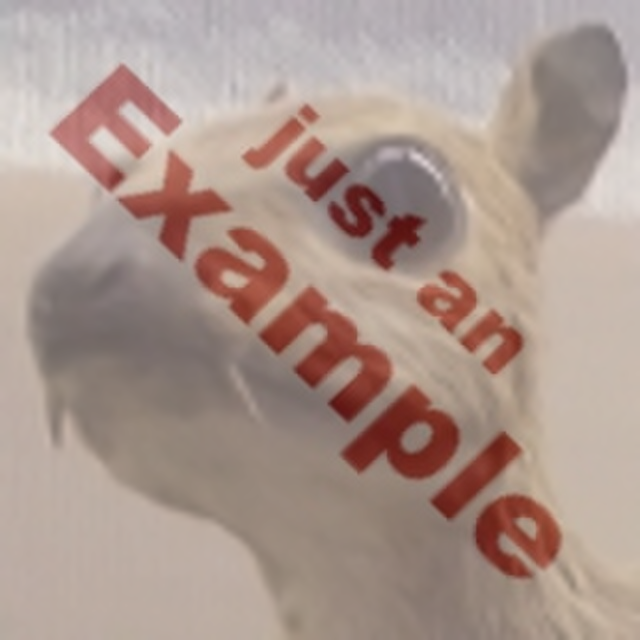

In [11]:
output = linear_combination(i1, i2_resized, 0.6, 0.4)
cv2_imshow(output)